<a href="https://colab.research.google.com/github/aditic04/1BM22CS014-ML-LAB/blob/main/1BM22CS014_ML_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


### **SVM**

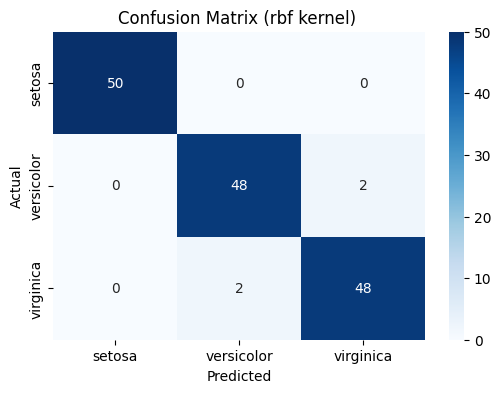

Accuracy with rbf kernel: 0.9733




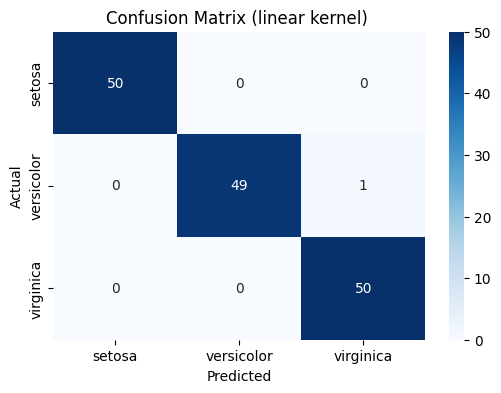

Accuracy with linear kernel: 0.9933




In [18]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


iris_df = pd.read_csv('iris.csv')
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

def evaluate_svm_full_data(kernel_type):
    svm_clf = SVC(kernel=kernel_type, random_state=42)
    svm_clf.fit(X, y)
    y_pred = svm_clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=svm_clf.classes_,
                yticklabels=svm_clf.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel) ')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Accuracy with {kernel_type} kernel: {accuracy:.4f}")
    print("\n")

evaluate_svm_full_data('rbf')
evaluate_svm_full_data('linear')

### **KNN**


Fixed K value: 5

Accuracy with K=5: 0.9667

Confusion Matrix with K=5:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


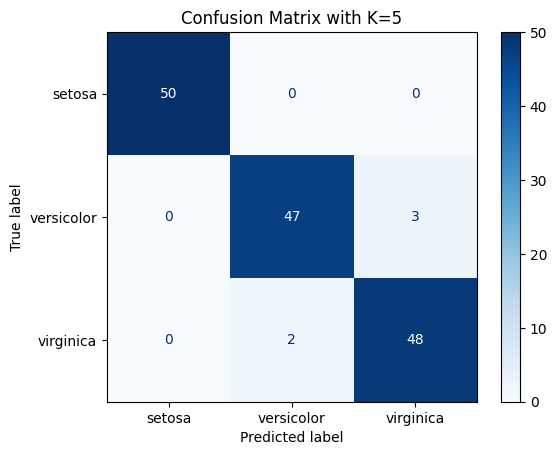


Classification Report with K=5:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('iris.csv')

X = data.drop('species', axis=1)
y = data['species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

optimal_k = 5
print(f"\nFixed K value: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X, y_encoded)

y_pred = knn.predict(X)

accuracy = accuracy_score(y_encoded, y_pred)
print(f"\nAccuracy with K=5: {accuracy:.4f}")

cm = confusion_matrix(y_encoded, y_pred)
print("\nConfusion Matrix with K=5:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix with K=5')
plt.show()

print("\nClassification Report with K=5:")
print(classification_report(y_encoded, y_pred, target_names=le.classes_))